# Imports and Constraints

# Defines

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import category_encoders as ce
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator


def load_data() -> pd.Series:
    csv_train = pd.read_csv('train.txt', sep=" ").assign(train = 1) 
    csv_test = pd.read_csv('testx.txt', sep=" ").assign(train = 0)
    csv = pd.concat([csv_train,csv_test])
    classes = csv['class']
    csv = csv.drop(['class'], axis=1)
#     print(f"class0: {percentage0}%,\tclass1: {percentage1}%")
    return csv, classes

def del_nans(nans_perc):
    # Find those where nans is over nans_perc
    global csv, nans
    na = csv.isna().sum()
    del_na = na[na >= nans_perc*len(csv)]
    csv = csv.drop(del_na.index.values, axis=1)
    nans = nans_ctr()
    
def nans_ctr() -> pd.Series:
    return csv.isna().sum()

def unique_ctr() -> pd.Series():
    unique = pd.Series()
    for col in list(csv_org):
    #     len(csv[col].unique().astype(int))
    #     print(f"col {col}\t unique: {len(csv[col].unique())}")
        if(csv.columns.contains(col) and (col != 'train')):
            unique.at[col] = len(csv[col].unique())
#     print(unique.head(5))
    return unique
def val_types() -> pd.Series():
    val_type = pd.Series()
    for col in list(csv_org):
        if not csv.columns.contains(col) or col == 'train':
            continue
        if csv[col].dtype == np.float64:
            val_type.at[col] = np.float64
        elif csv[col].dtype == np.int64:
            val_type.at[col] = np.int64
        elif csv[col].dtype == np.int32:
            val_type.at[col] = np.int32
        elif csv[col].dtype == object:
            val_type.at[col] = object
        else:
            print(f"No common value type found in val_types() - {csv[col].dtype}")
#     print(f"float: {sum(val_type == np.float64)}")
#     print(f"int: {sum(val_type == np.int64)}")
#     print(f"string: {sum(val_type == object)}")
    return val_type
def stat(f):
    nans = nans_ctr()
    unique = unique_ctr()
    val_type = val_types()
    print(f"min: {csv[f].min()}")
    print(f"max: {csv[f].max()}")
    print(f"nans: {nans[f]}")
    print(f"unique: {unique[f]}")
    print(f"val_type: {val_type[f]}")
    print(f"vals per class: {round((len(csv)-nans[f])/unique[f],2)}")
    
def plot(data, sort=False, log=True, small=False):
    if small:
        figsize = (8,4)
    else:
        figsize = (20,10)
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    if sort:
        ax = df.sort_values(by=0, ascending=False).plot(kind='bar', logy = log, figsize=figsize, legend=False)
    else:
        ax = df.plot(kind='bar', logy = log, figsize=figsize, legend=False)
    plt.xticks(fontsize=7, rotation=90)
    plt.show()
    
def threshold_factorization(data, *t_list) -> pd.Series():
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    df = df.sort_values(by=0, ascending=False)
    t_list = (df.values[0].item()+1,) + t_list + (0,)
    out = data.copy()
#     print(f"all labels: {len(letter_counts)}")
    for i in tqdm(range(1,len(t_list)),desc="Progress",leave=False):
        idx = df[(df>t_list[i]).values & (df<=t_list[i-1]).values].index
#         print(f"labels in range ({t_list[i]}, {t_list[i-1]}): {len(idx)}")
        for j in tqdm(idx,leave=False):
            out.loc[out == j] = i
    return out

def factorize(data) -> pd.Series():
#     series = data.fillna(-1)
    series = data.copy()
    labels, _ = pd.factorize(series)
    series = labels[:len(series)]
    return series

def cast(data, lower_t, upper_t) -> pd.Series():
#     print(f"Casting with max , min = ({lower_t},{upper_t})")
    data = data.sort_values()
    data[data<lower_t] = lower_t
    data[data>upper_t] = upper_t
    return data

def standarize(df) ->pd.Series():
    return round((df-df.min())/(df.max()-df.min()),4)

def one_hot_encoding(f):
    global csv
    ohe = ce.OneHotEncoder(cols = [f], handle_unknown='ignore', use_cat_names=True)
    csv[f] = csv[f].fillna(-1)
    new_features = ohe.fit_transform(csv[f].to_frame())
    csv = csv.drop([f],axis=1)
    csv = pd.concat([csv,new_features],axis=1)
    
def binary_encoding(f):
    global csv
    ohe = ce.BinaryEncoder(cols = [f], handle_unknown='ignore',drop_invariant=True)
    csv[f] = csv[f].fillna(-1)
    new_features = ohe.fit_transform(csv[f].to_frame())
    csv = csv.drop([f],axis=1)
    csv = pd.concat([csv,new_features],axis=1)  
def delete(f):
    global csv
    csv[f] = csv_org[f]
    csv = csv.drop(f, axis=1)

# Template

In [25]:
f = 'Var'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
stat(f)
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],1000,100,1)
# csv[f] = standarize(csv[f])
# csv[f] = factorize(csv[f])
plot(csv[f].sort_values(),small=True)
# one_hot_encoding(f)

KeyError: 'Var'

# Data Cleaning

In [21]:
csv,classes = load_data()
csv_org = csv.copy()
nans = nans_ctr()
unique = unique_ctr()
val_type = val_types()
print(max(nans))
del_nans(0.99)
print(max(nans))
print(len(csv.columns))

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


50000
49442
207


# Data Preprocessing

In [ ]:
f = 'Var17'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var172'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var171'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var170'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var169'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var168'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var167'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var166'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var165'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var164'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var163'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var162'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var161'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [ ]:
f = 'Var160'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


min: 0.0
max: 1.0
nans: 0
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 8333.33
None


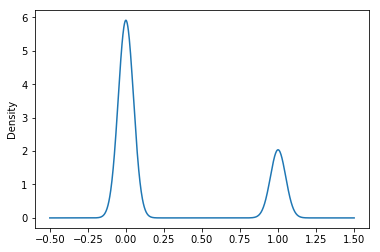

In [240]:
f = 'Var159'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


In [237]:
f = 'Var158'
delete(f)


min: 0.0
max: 5440.0
nans: 48871
unique: 65
val_type: <class 'numpy.float64'>
vals per class: 17.37
None


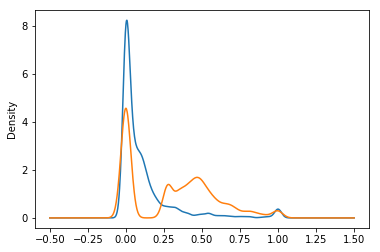

In [235]:
f = 'Var157'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 8050.0
nans: 49306
unique: 101
val_type: <class 'numpy.float64'>
vals per class: 6.87
None


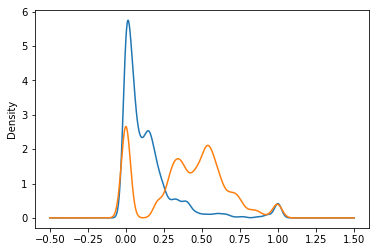

In [234]:
f = 'Var156'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


In [233]:
f = 'Var155'
delete(f)

min: 0.0
max: 15048560.0
nans: 49298
unique: 389
val_type: <class 'numpy.float64'>
vals per class: 1.8
None


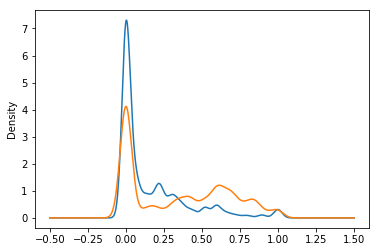

In [231]:
f = 'Var154'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 1.0
nans: 0
unique: 5809
val_type: <class 'numpy.float64'>
vals per class: 8.61
None


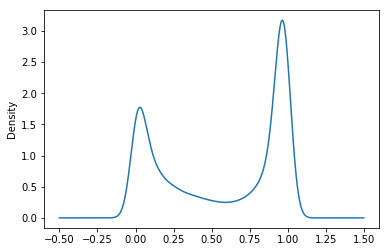

In [230]:
f = 'Var153'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 7
val_type: <class 'numpy.float64'>
vals per class: 7142.86
None


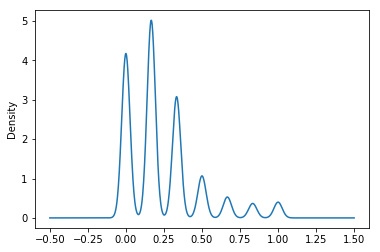

In [228]:
f = 'Var152'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()


min: 0.0
max: 1200.0
nans: 49153
unique: 20
val_type: <class 'numpy.float64'>
vals per class: 42.35
None


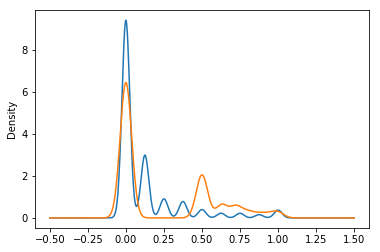

In [226]:
f = 'Var151'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 6048000.0
nans: 48421
unique: 601
val_type: <class 'numpy.float64'>
vals per class: 2.63
None


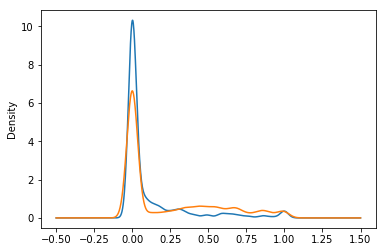

In [225]:
f = 'Var150'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 1.0
nans: 0
unique: 5355
val_type: <class 'numpy.float64'>
vals per class: 9.34
None


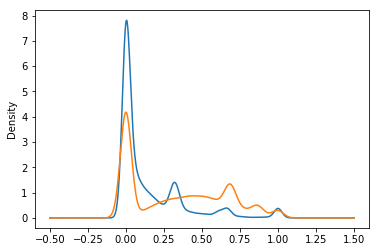

In [224]:
f = 'Var149'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 1.0
nans: 0
unique: 90
val_type: <class 'numpy.float64'>
vals per class: 555.56
None


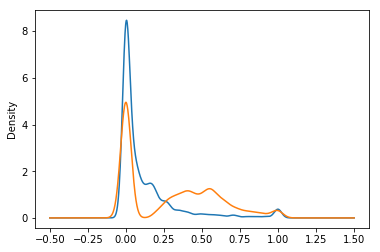

In [222]:
f = 'Var148'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 8.0
nans: 48513
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 247.83
None


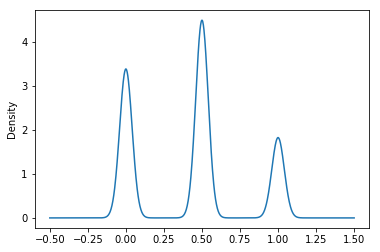

In [220]:
f = 'Var147'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 96.0
nans: 48513
unique: 11
val_type: <class 'numpy.float64'>
vals per class: 135.18
None


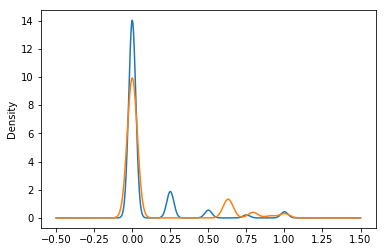

In [219]:
f = 'Var146'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 57
val_type: <class 'numpy.float64'>
vals per class: 877.19
None


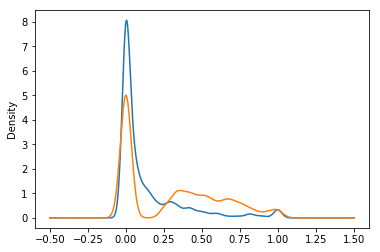

In [218]:
f = 'Var145'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 8333.33
None


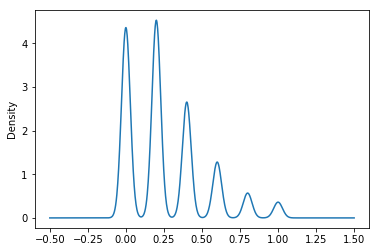

In [216]:
f = 'Var144'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

In [213]:
f = 'Var143'
delete(f)

In [212]:
f = 'Var142'
delete(f)

In [211]:
f = 'Var141'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

KeyError: 'Var141'

min: 0.0
max: 1.0
nans: 0
unique: 1915
val_type: <class 'numpy.float64'>
vals per class: 26.11
None


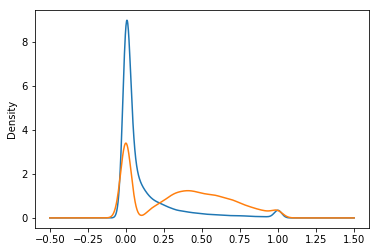

In [209]:
f = 'Var140'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/4))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 565
val_type: <class 'numpy.float64'>
vals per class: 88.5
None


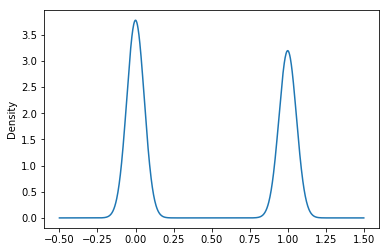

In [207]:
f = 'Var139'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

In [205]:
f = 'Var138'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 10
val_type: <class 'numpy.float64'>
vals per class: 5000.0
None


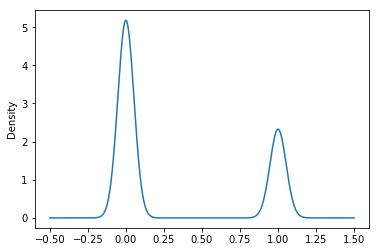

In [204]:
f = 'Var137'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

In [201]:
f = 'Var136'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 611
val_type: <class 'numpy.float64'>
vals per class: 81.83
None


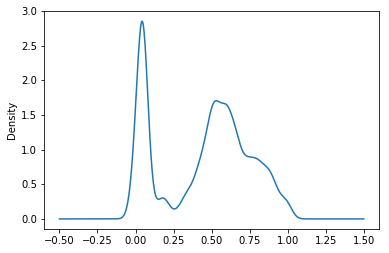

In [198]:
f = 'Var135'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 5990
val_type: <class 'numpy.float64'>
vals per class: 8.35
None


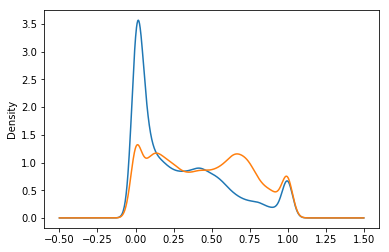

In [196]:
f = 'Var133'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 4
val_type: <class 'numpy.float64'>
vals per class: 12500.0
None


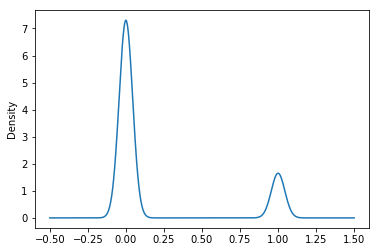

In [193]:
f = 'Var132'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 111
val_type: <class 'numpy.float64'>
vals per class: 450.45
None


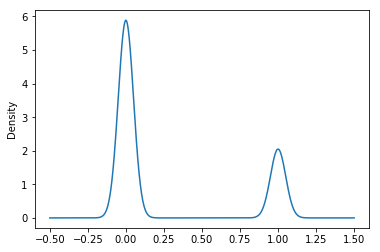

In [189]:
f = 'Var131'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

In [ ]:
f = 'Var130'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 12
val_type: <class 'numpy.float64'>
vals per class: 4166.67
None


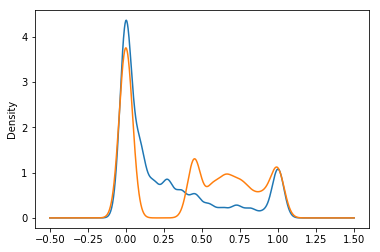

In [187]:
f = 'Var129'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 51
val_type: <class 'numpy.float64'>
vals per class: 980.39
None


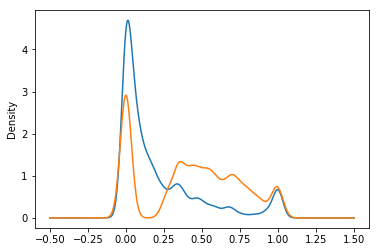

In [185]:
f = 'Var128'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 15
val_type: <class 'numpy.float64'>
vals per class: 3333.33
None


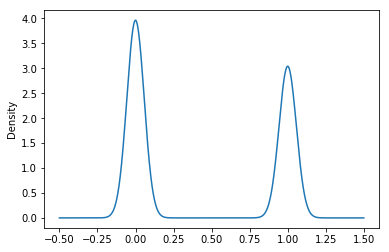

In [182]:
f = 'Var127'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 51
val_type: <class 'numpy.float64'>
vals per class: 980.39
None


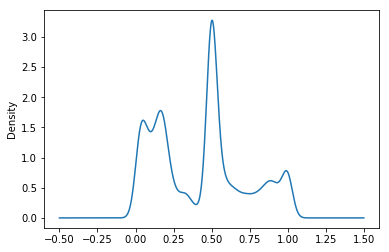

In [179]:
f = 'Var126'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 5715
val_type: <class 'numpy.float64'>
vals per class: 8.75
None


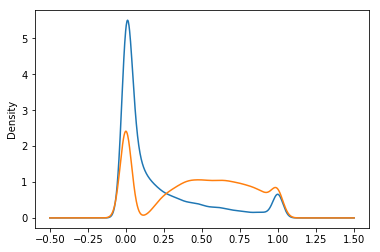

In [177]:
f = 'Var125'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/4))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 273
val_type: <class 'numpy.float64'>
vals per class: 183.15
None


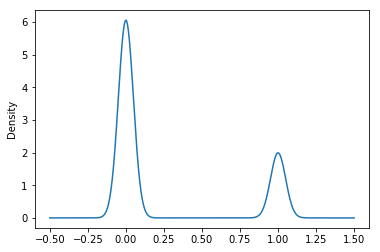

In [174]:
f = 'Var124'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 24
val_type: <class 'numpy.float64'>
vals per class: 2083.33
None


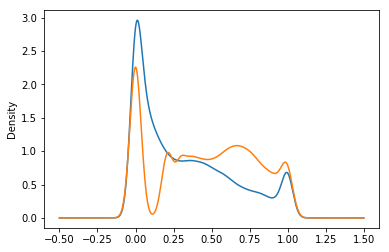

In [172]:
f = 'Var123'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 6.0
nans: 48759
unique: 4
val_type: <class 'numpy.float64'>
vals per class: 310.25
None


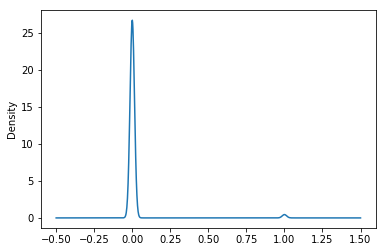

In [170]:
f = 'Var122'
delete(f)

min: 0.0
max: 672.0
nans: 49298
unique: 34
val_type: <class 'numpy.float64'>
vals per class: 20.65
None


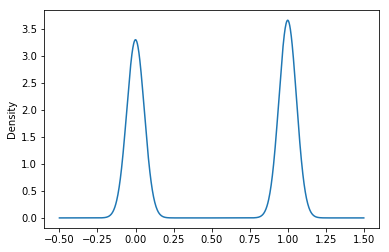

In [169]:
f = 'Var121'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 24
val_type: <class 'numpy.float64'>
vals per class: 2083.33
None


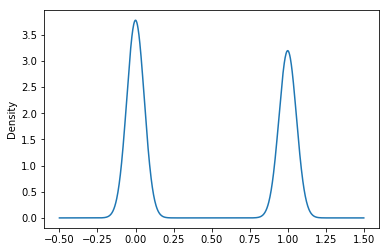

In [168]:
f = 'Var120'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 477
val_type: <class 'numpy.float64'>
vals per class: 104.82
None


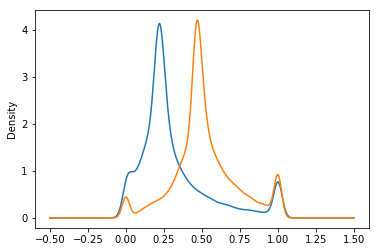

In [166]:
f = 'Var119'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [163]:
f = 'Var118'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 541
val_type: <class 'numpy.float64'>
vals per class: 92.42
None


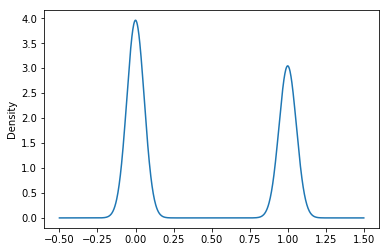

In [162]:
f = 'Var117'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

In [160]:
f = 'Var116'
delete(f)

min: 0.0
max: 5337.0
nans: 49180
unique: 36
val_type: <class 'numpy.float64'>
vals per class: 22.78
None


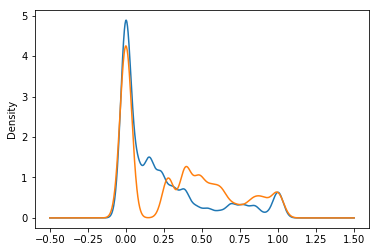

In [159]:
f = 'Var115'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 551
val_type: <class 'numpy.float64'>
vals per class: 90.74
None


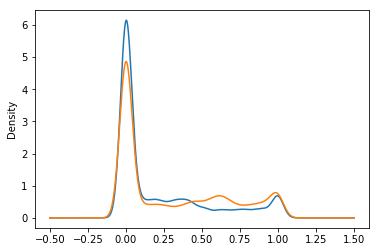

In [158]:
f = 'Var114'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [155]:
f = 'Var113'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 27
val_type: <class 'numpy.float64'>
vals per class: 1851.85
None


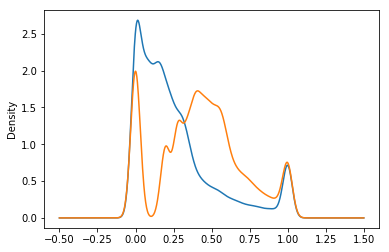

In [149]:
f = 'Var112'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 675
val_type: <class 'numpy.float64'>
vals per class: 74.07
None


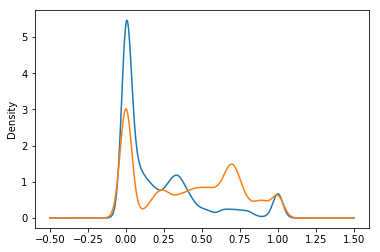

In [147]:
f = 'Var111'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 6.0
max: 30.0
nans: 49298
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 117.0
None


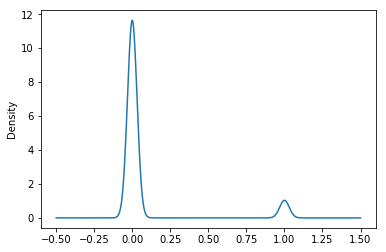

In [142]:
f = 'Var110'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 22
val_type: <class 'numpy.float64'>
vals per class: 2272.73
None


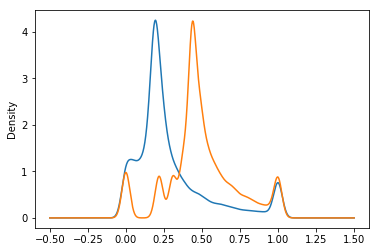

In [141]:
f = 'Var109'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 2
val_type: <class 'numpy.float64'>
vals per class: 25000.0
None


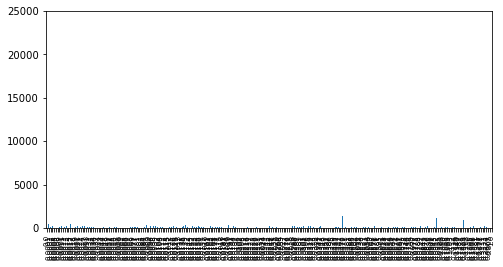

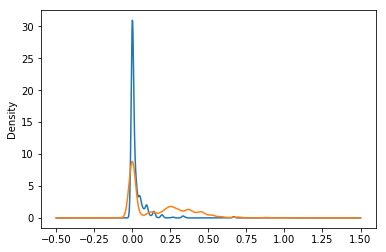

In [139]:
f = 'Var108'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()
plot(csv[f].sort_values(),log=False,small=True)

min: 0.0
max: 1932.0
nans: 48513
unique: 25
val_type: <class 'numpy.float64'>
vals per class: 59.48
None


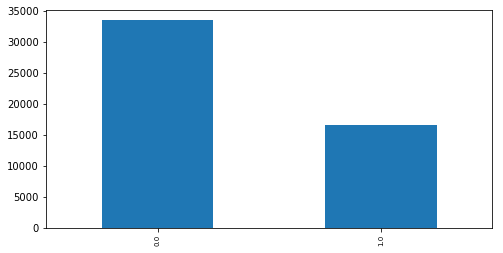

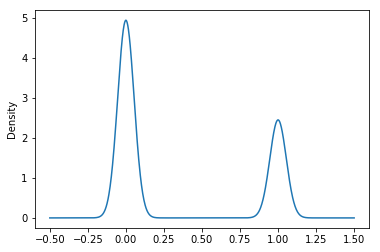

In [136]:
f = 'Var107'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()


In [135]:
f = 'Var106'
delete(f)

In [130]:
f = 'Var105'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 2
val_type: <class 'numpy.float64'>
vals per class: 25000.0
None


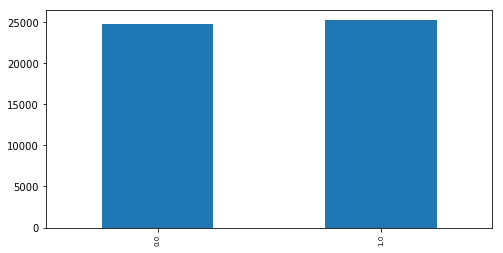

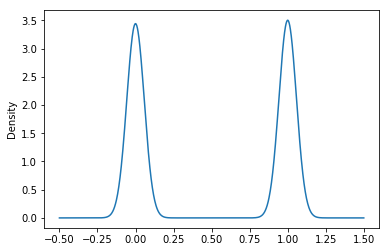

In [129]:
f = 'Var104'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],2100)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()


min: 1.0
max: 2.0
nans: 0
unique: 2
val_type: <class 'numpy.float64'>
vals per class: 25000.0
None


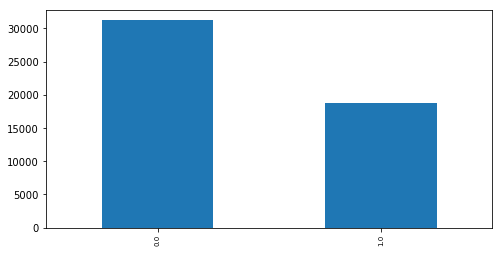

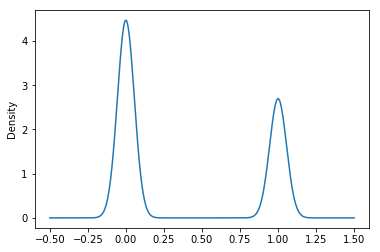

In [123]:
f = 'Var103'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()


min: 0.0
max: 1755.0
nans: 0
unique: 28
val_type: <class 'numpy.float64'>
vals per class: 1785.71
None


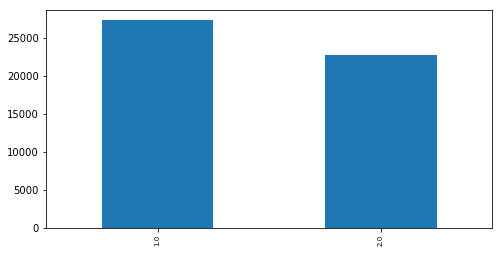

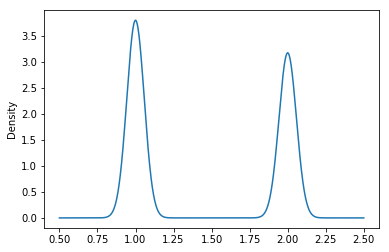

In [116]:
f = 'Var101'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()


min: 0.0
max: 1.0
nans: 0
unique: 2
val_type: <class 'numpy.float64'>
vals per class: 25000.0
None


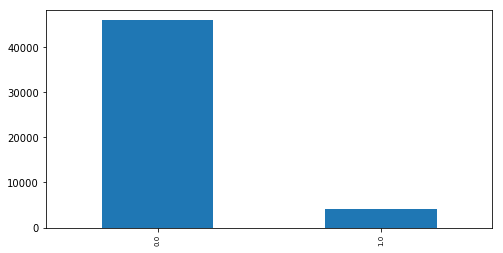

In [114]:
f = 'Var100'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10)
plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()

min: 0.0
max: 1.0
nans: 0
unique: 30
val_type: <class 'numpy.float64'>
vals per class: 1666.67
None


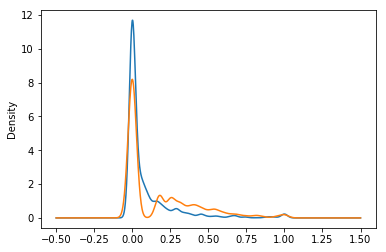

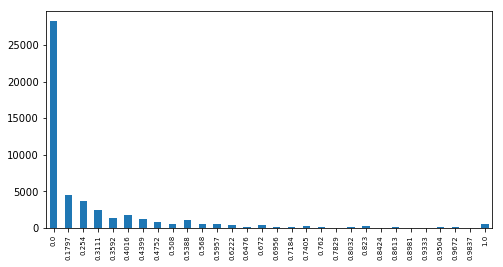

In [107]:
f = 'Var99'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()
plot(csv[f].sort_values(),log=False,small=True)

min: 1.0
max: 2.0
nans: 0
unique: 2
val_type: <class 'numpy.float64'>
vals per class: 25000.0
None


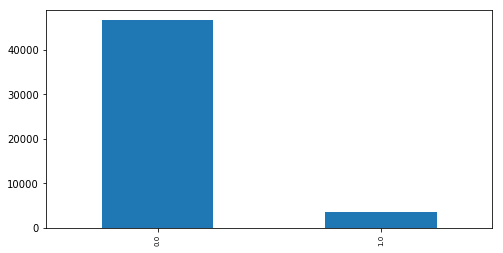

In [102]:
f = 'Var98'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = threshold_factorization(csv[f],100)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()

min: 0.0
max: 36.0
nans: 0
unique: 7
val_type: <class 'numpy.float64'>
vals per class: 7142.86
None


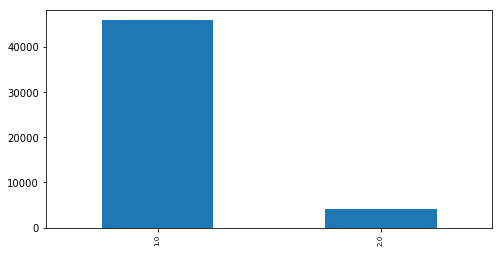

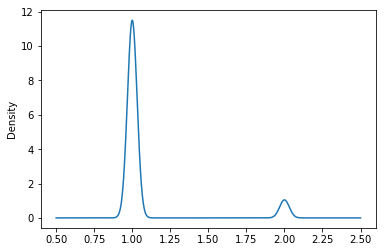

In [95]:
f = 'Var97'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()

In [92]:
f = 'Var95'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 4913
val_type: <class 'numpy.float64'>
vals per class: 10.18
None


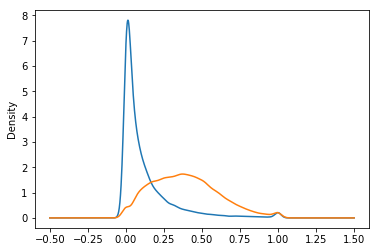

In [61]:
f = 'Var94'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
# plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [35]:
f = 'Var93'
delete(f)

min: 0.0
max: 1.0
nans: 0
unique: 107
val_type: <class 'numpy.float64'>
vals per class: 467.29
None


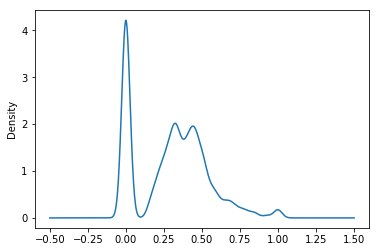

In [63]:
f = 'Var91'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

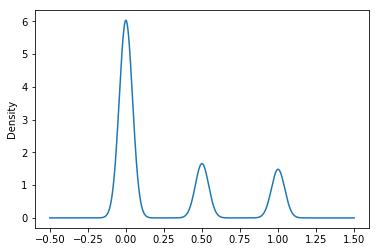

In [149]:
f = 'Var89'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

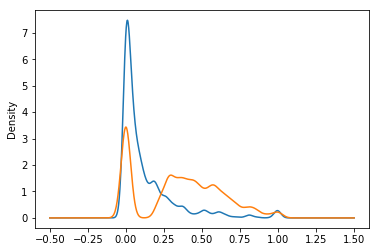

In [64]:
f = 'Var88'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

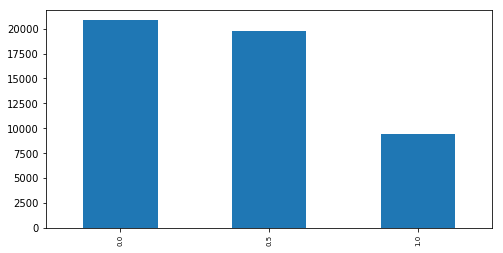

In [147]:
f = 'Var87'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
plot(csv[f].sort_values(),log=False,small=True)
# csv[f].plot.kde()

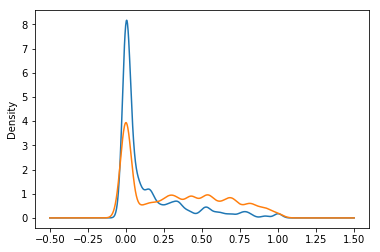

In [65]:
f = 'Var86'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

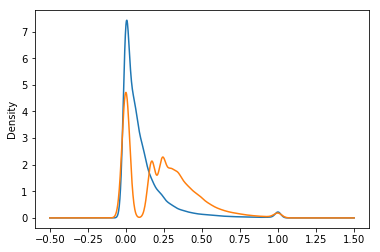

In [67]:
f = 'Var85'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

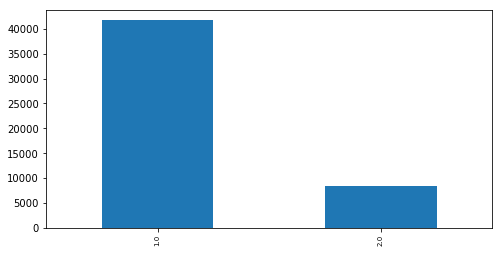

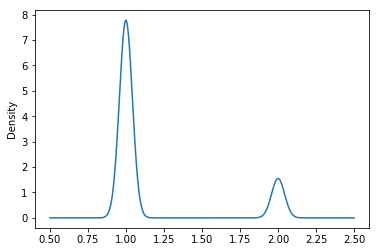

In [138]:
f = 'Var84'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],20000)
plot(csv[f].sort_values(),log=False,small=True)


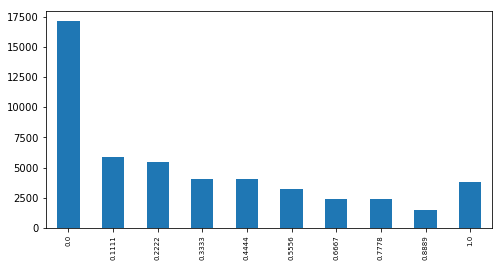

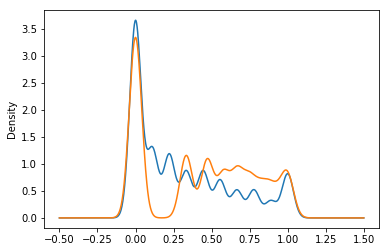

In [69]:
f = 'Var83'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.93))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],2)
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

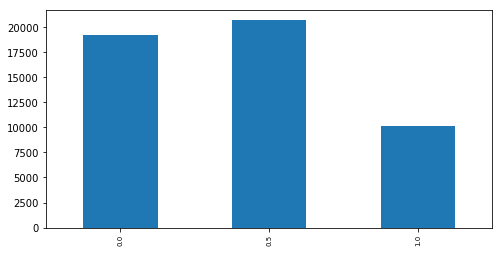

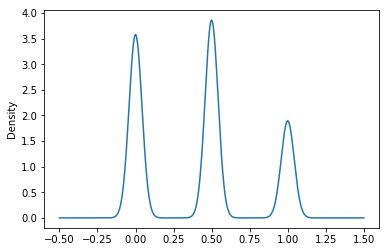

In [131]:
f = 'Var82'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],2)
plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

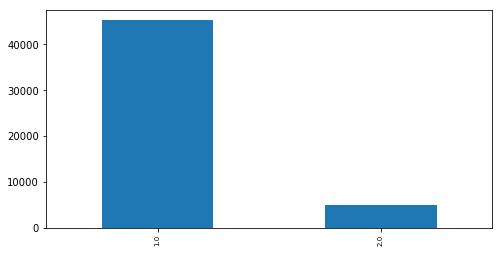

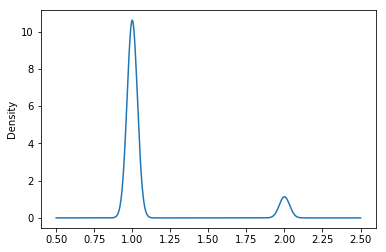

In [126]:
f = 'Var81'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],2)
plot(csv[f].sort_values(),log=False,small=True)
one_hot_encoding(f)

min: 0.0
max: 3637080.0
nans: 48513
unique: 401
val_type: <class 'numpy.float64'>
vals per class: 3.71
None


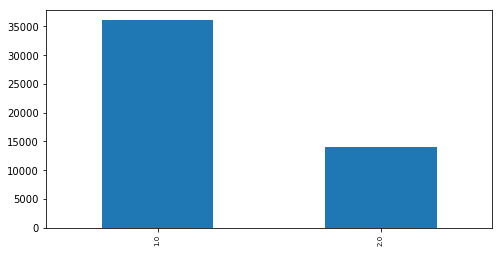

In [70]:
f = 'Var80'
print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = threshold_factorization(csv[f],20000)
plot(csv[f].sort_values(),log=False,small=True)
one_hot_encoding(f)

min: 0.0
max: 1.0
nans: 0
unique: 5
val_type: <class 'numpy.float64'>
vals per class: 10000.0
None


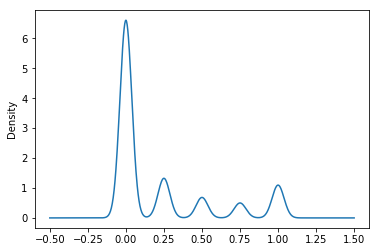

In [114]:
f = 'Var77'
print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

min: nan
max: nan
nans: 50000
unique: 1
val_type: <class 'numpy.float64'>
vals per class: 0.0
None


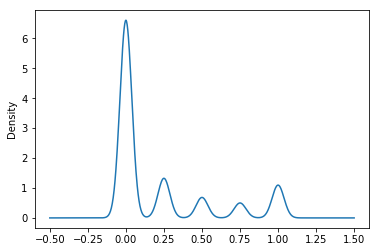

In [113]:
f = 'Var77'
print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

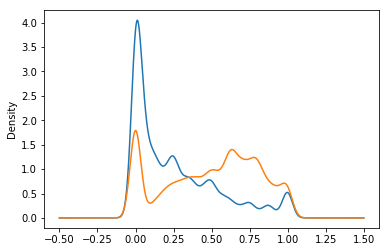

In [71]:
f = 'Var76'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.97))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

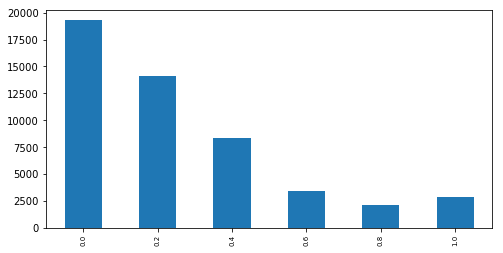

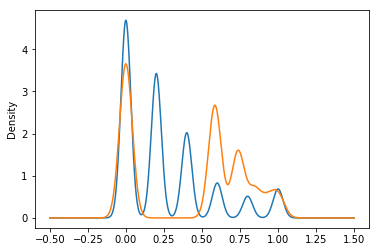

In [72]:
f = 'Var75'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

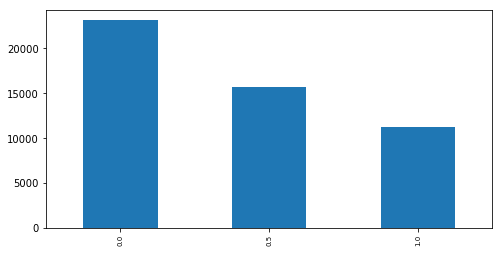

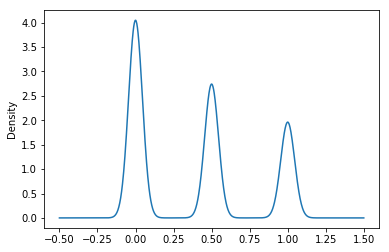

In [95]:
f = 'Var74'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.7))
csv[f] = threshold_factorization(csv[f],20000,10000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)


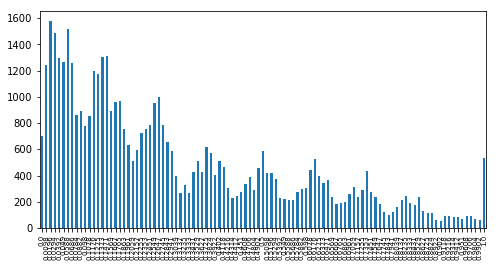

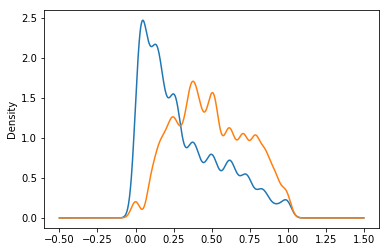

In [74]:
f = 'Var73'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

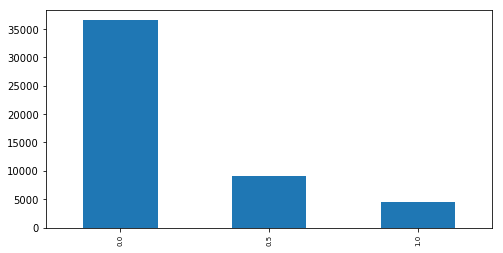

In [87]:
f = 'Var72'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
# csv[f].plot.kde()

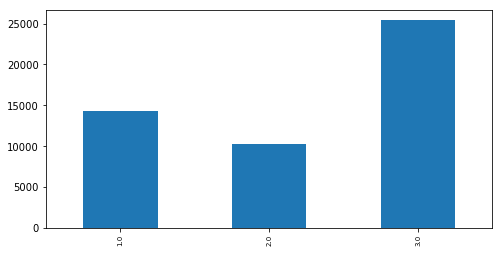

In [84]:
f = 'Var71'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.80))
csv[f] = threshold_factorization(csv[f],12000,8000)
plot(csv[f].sort_values(),log=False,small=True)

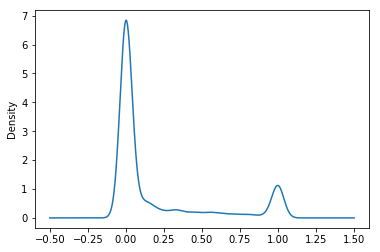

In [79]:
f = 'Var70'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

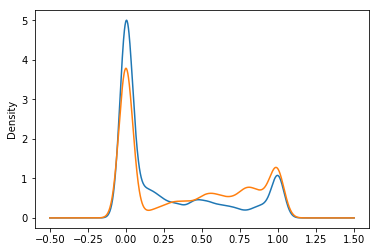

In [75]:
f = 'Var69'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

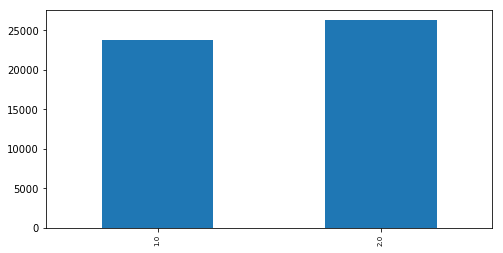

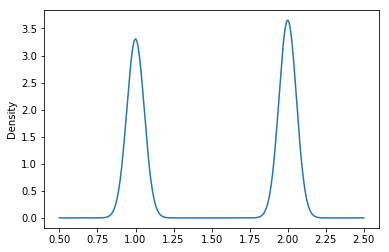

In [73]:
f = 'Var68'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)

In [69]:
f = 'Var67'
delete(f)

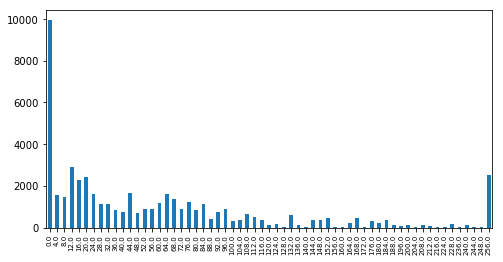

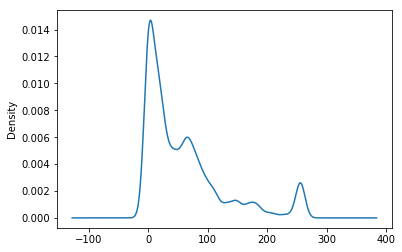

In [60]:
f = 'Var66'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

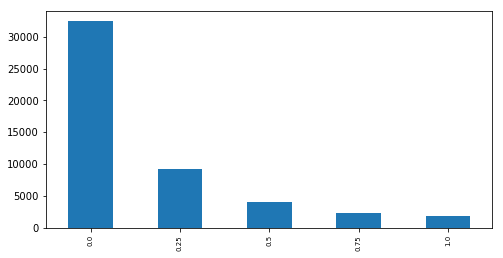

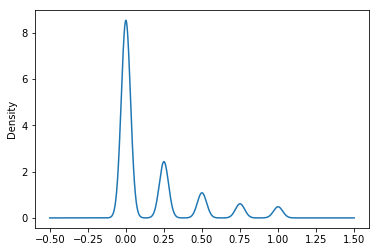

In [58]:
f = 'Var65'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)

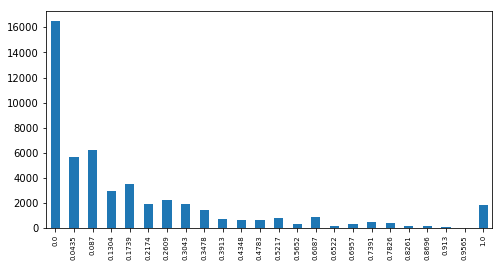

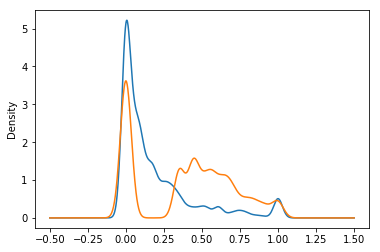

In [76]:
f = 'Var63'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.97))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

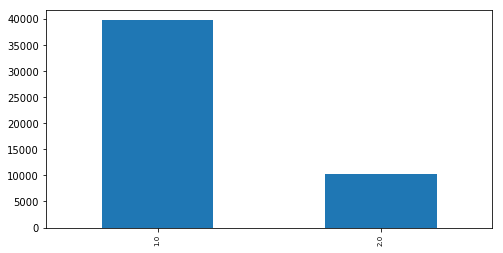

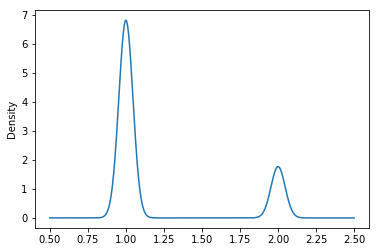

In [51]:
f = 'Var62'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = threshold_factorization(csv[f],20000)
plot(csv[f].sort_values(),log=False,small=True)

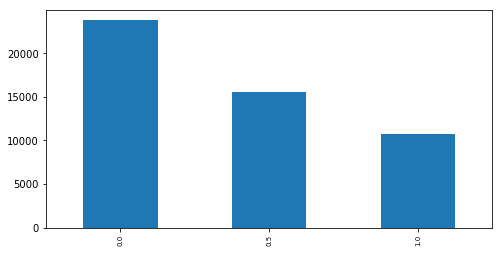

In [46]:
f = 'Var61'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],8000,2000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),log=False,small=True)

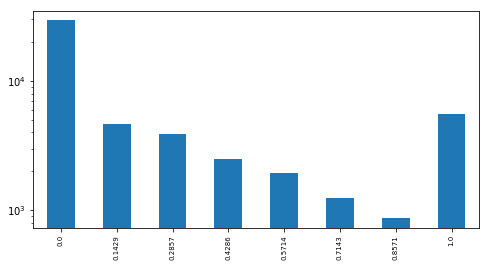

In [47]:
f = 'Var60'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

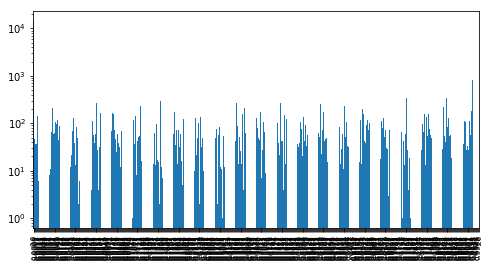

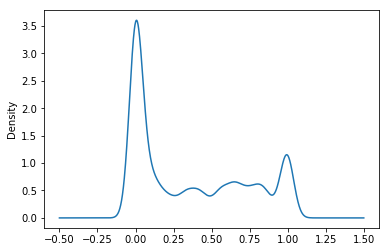

In [35]:
f = 'Var59'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

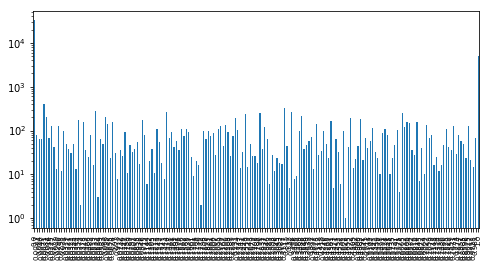

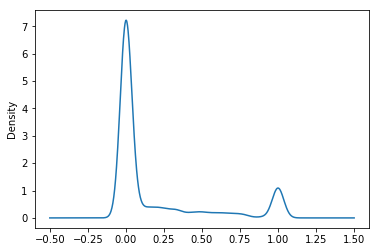

In [30]:
f = 'Var58'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)
csv[f].plot.kde()

In [9]:
f = 'Var57'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f],small=True)

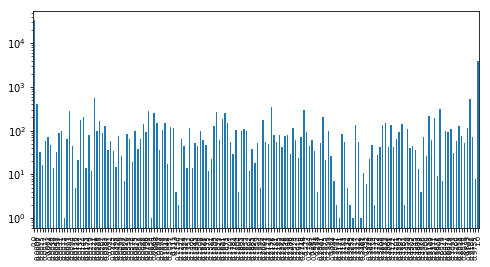

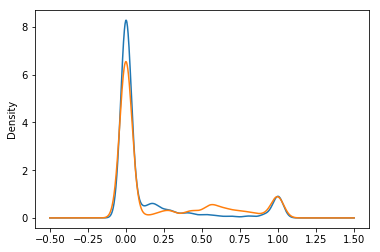

In [78]:
f = 'Var56'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.93))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)
ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

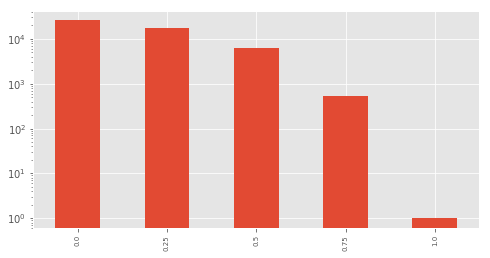

In [416]:
f = 'Var54'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

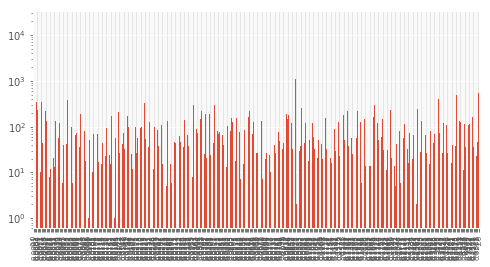

In [410]:
f = 'Var53'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

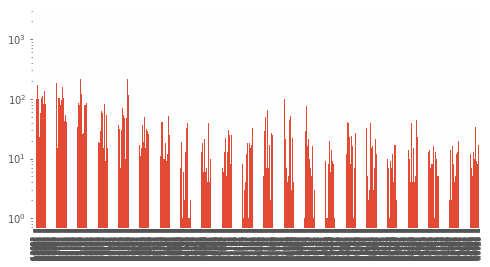

In [408]:
f = 'Var51'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

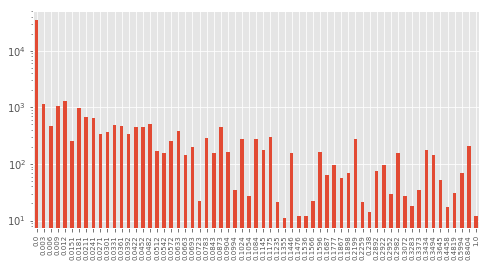

In [406]:
f = 'Var50'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

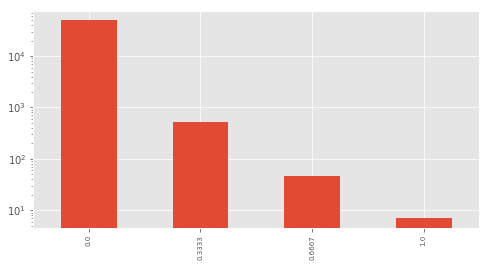

In [405]:
f = 'Var49'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

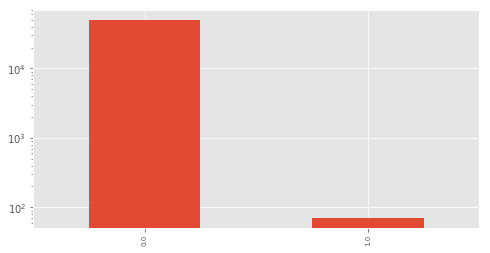

In [404]:
f = 'Var47'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],100)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

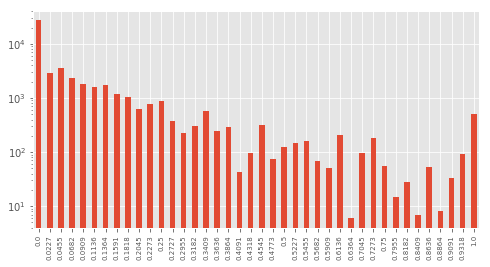

In [391]:
f = 'Var46'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

In [392]:
f = 'Var44'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

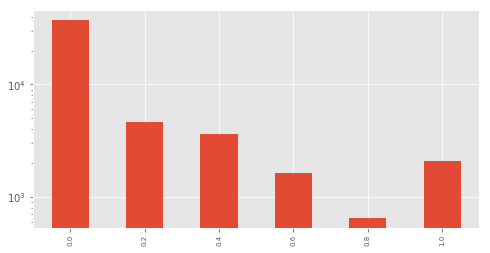

In [385]:
f = 'Var43'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.96))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

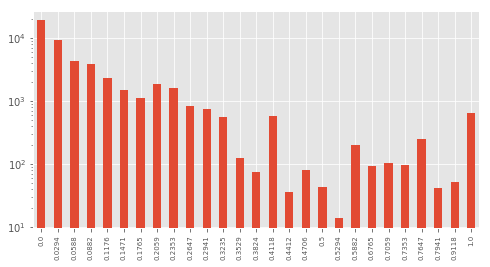

In [382]:
f = 'Var41'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

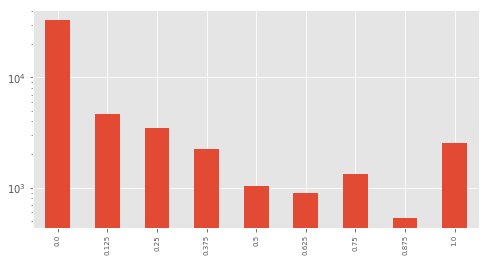

In [379]:
f = 'Var40'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

In [376]:
f = 'Var38'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

min: 0.0
max: 11635020.0
nans: 48421
unique: 551
val_type: <class 'numpy.float64'>
vals per class: 2.87


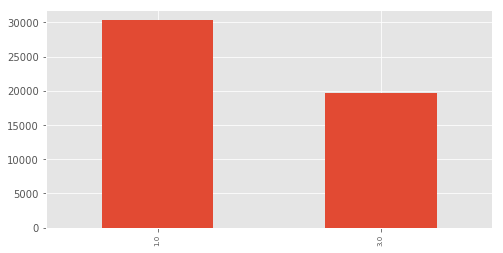

In [373]:
f = 'Var37'
csv[f] = csv_org[f]
stat(f)
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],9000,6000)
plot(csv[f].sort_values(),log=False,small=True)
one_hot_encoding(f)

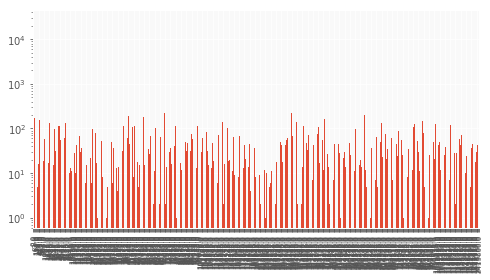

In [350]:
f = 'Var36'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = threshold_factorization(csv[f],20,3,1)
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

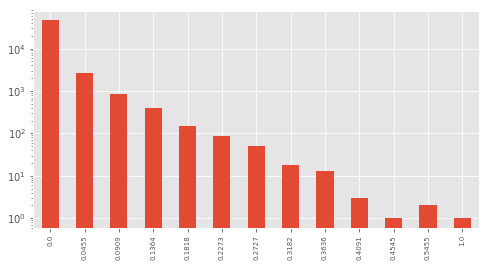

In [341]:
f = 'Var35'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

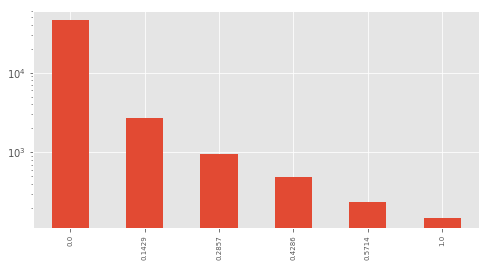

In [340]:
f = 'Var34'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

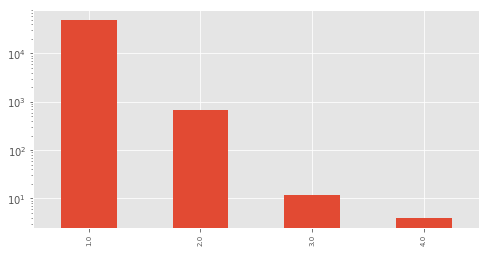

In [346]:
f = 'Var33'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],20,3,1)
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

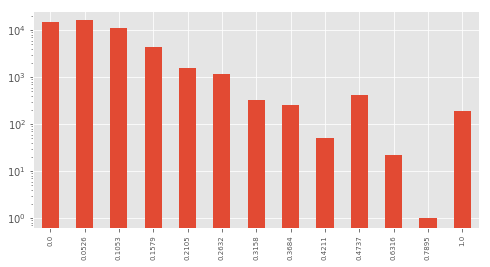

In [336]:
f = 'Var30'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

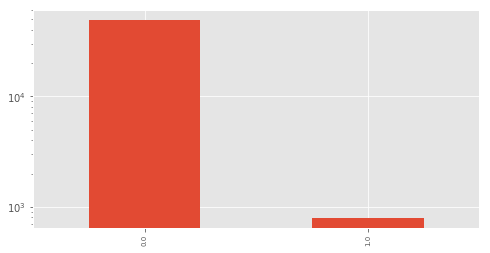

In [335]:
f = 'Var29'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: -66.88
max: 5158.56
nans: 0
unique: 4167
val_type: <class 'numpy.float64'>
vals per class: 12.0


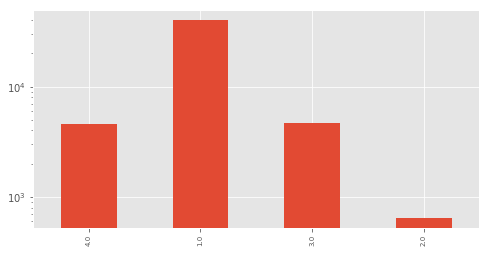

In [332]:
f = 'Var28'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],9,8,3)
plot(csv[f],small=True)
one_hot_encoding(f)

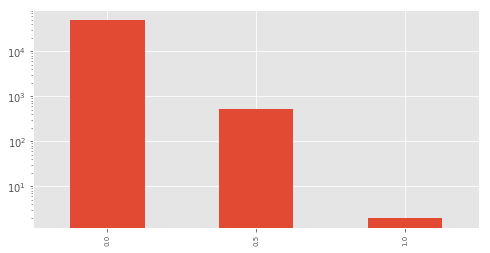

In [308]:
f = 'Var27'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)


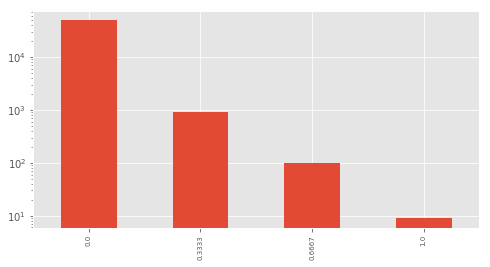

In [307]:
f = 'Var26'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)


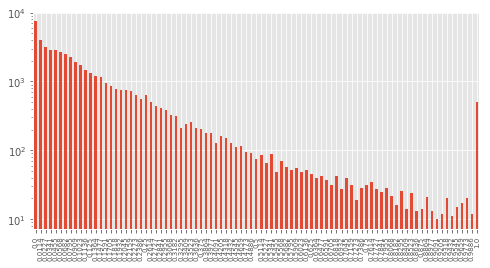

In [305]:
f = 'Var25'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)


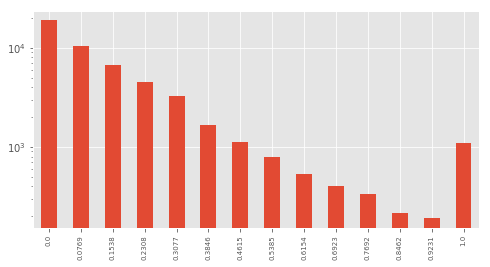

In [301]:
f = 'Var24'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

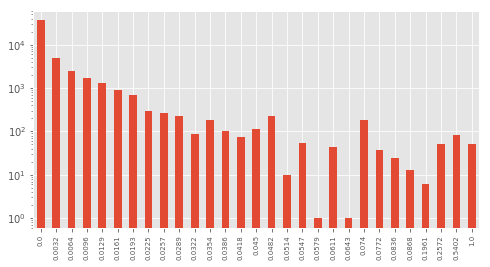

In [293]:
f = 'Var23'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

In [290]:
f = 'Var22'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

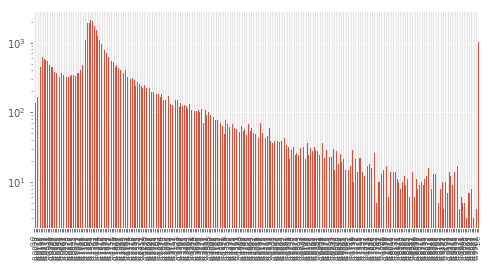

In [285]:
f = 'Var21'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

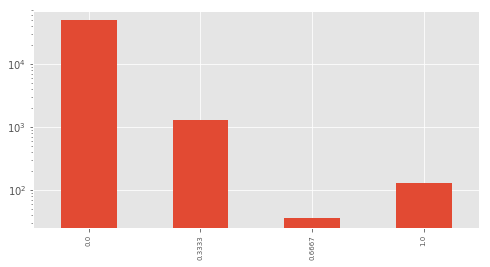

In [280]:
f = 'Var19'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: 0.0
max: 948.0
nans: 0
unique: 26
val_type: <class 'numpy.float64'>
vals per class: 1923.08


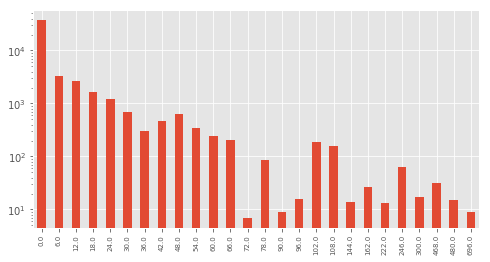

In [278]:
f = 'Var18'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
stat(f)
csv[f] = cast(csv[f],-100,696)
plot(csv[f].sort_values(),small=True)

min: 0.0
max: 1220.0
nans: 0
unique: 37
val_type: <class 'numpy.float64'>
vals per class: 1351.35


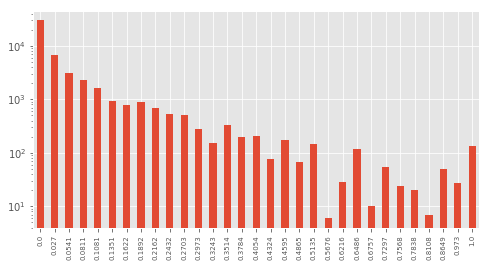

In [275]:
f = 'Var17'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
stat(f)
csv[f] = cast(csv[f],-100,185)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: 0.0
max: 434.92
nans: 0
unique: 597
val_type: <class 'numpy.float64'>
vals per class: 83.75


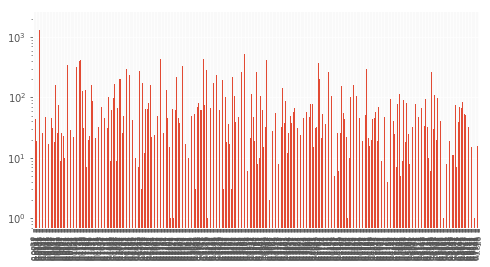

In [271]:
f = 'Var16'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
stat(f)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

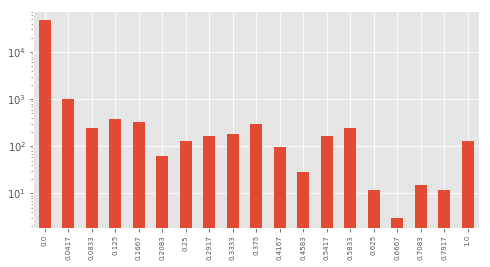

In [268]:
f = 'Var14'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

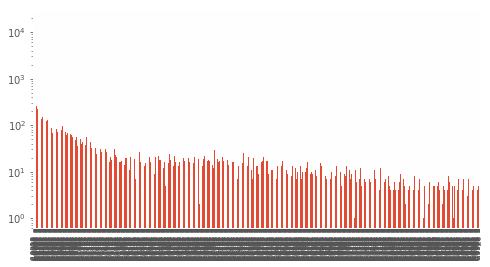

In [254]:
f = 'Var13'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,5000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

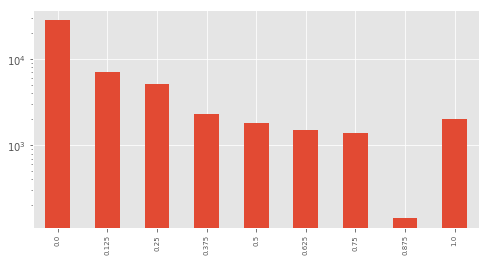

In [263]:
f = 'Var12'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,64)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: 8.0
max: 40.0
nans: 48760
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 206.67


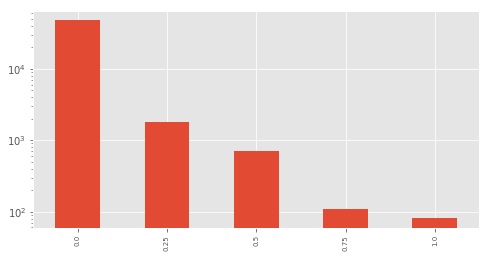

In [261]:
f = 'Var11'
stat(f)
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

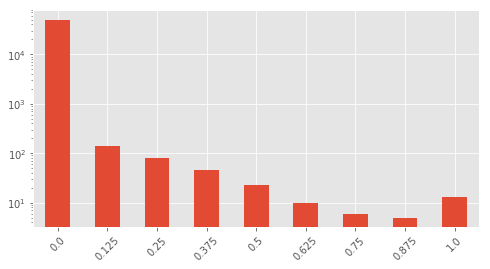

In [137]:
f = 'Var1'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,64)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

True


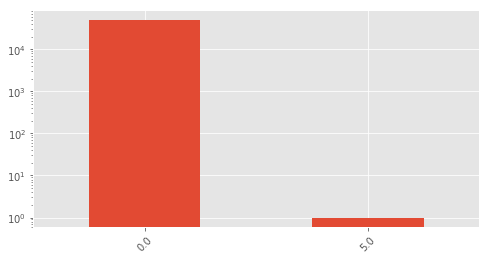

In [138]:
f = 'Var2'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

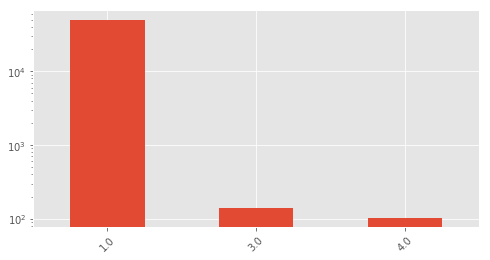

In [139]:
f = 'Var3'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = threshold_factorization(csv[f],1000,100,1)
plot(csv[f].sort_values(),sort=True,small=True)
one_hot_encoding(f)

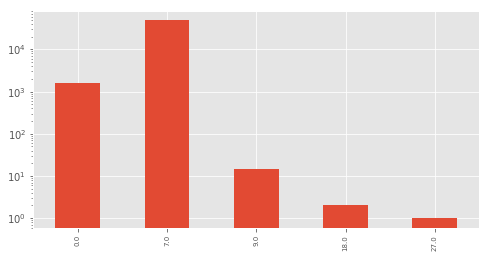

In [196]:
f = 'Var4'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(7)
# csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

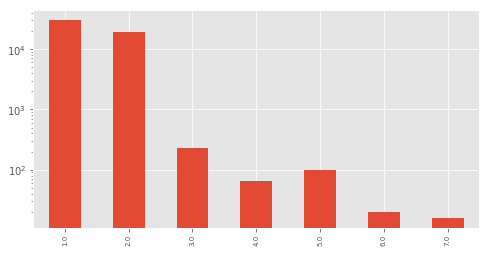

In [194]:
f = 'Var5'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = threshold_factorization(csv[f],1000,7,5,4,2,1)
plot(csv[f].sort_values(),small=True)
binary_encoding(f)

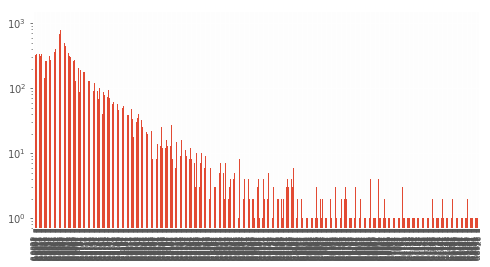

In [186]:
f = 'Var6'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

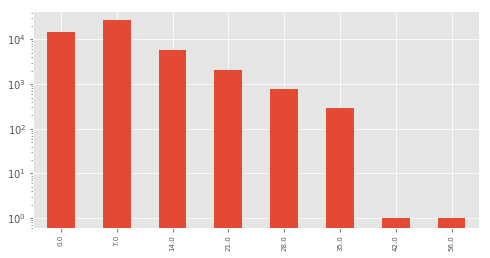

In [185]:
f = 'Var7'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,56)
# csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

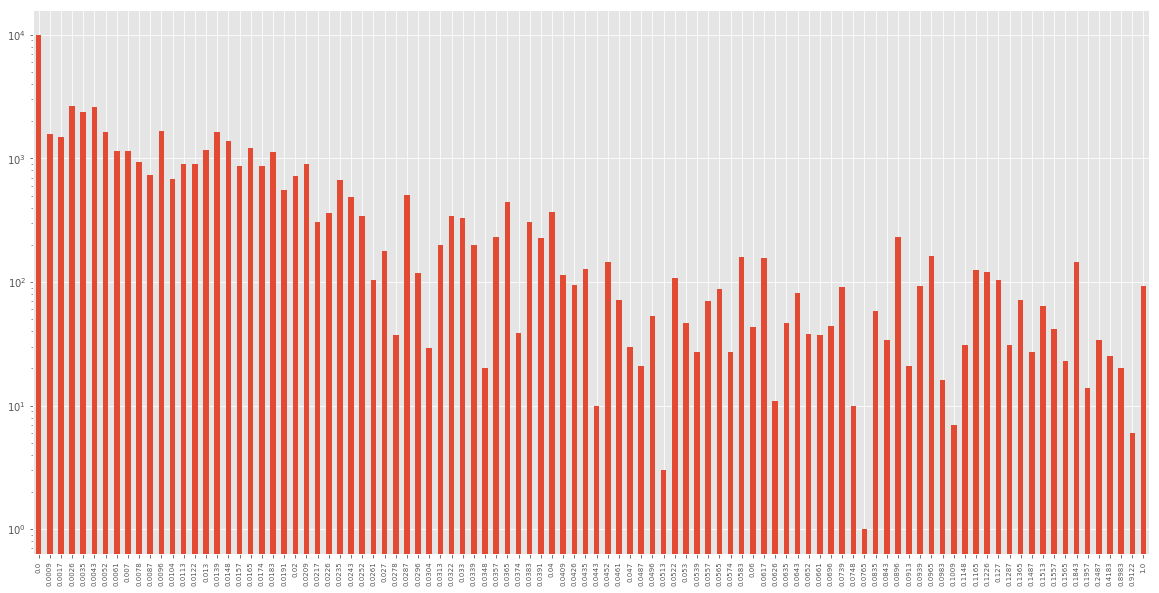

1.0

In [198]:
f = 'Var9'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].median())
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

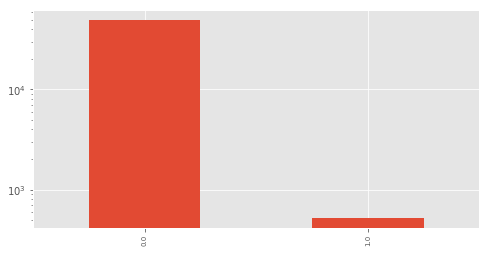

In [205]:
f = 'Var10'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].median())
csv[f] = threshold_factorization(csv[f],1)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

AttributeError: 'DataFrame' object has no attribute 'unique'

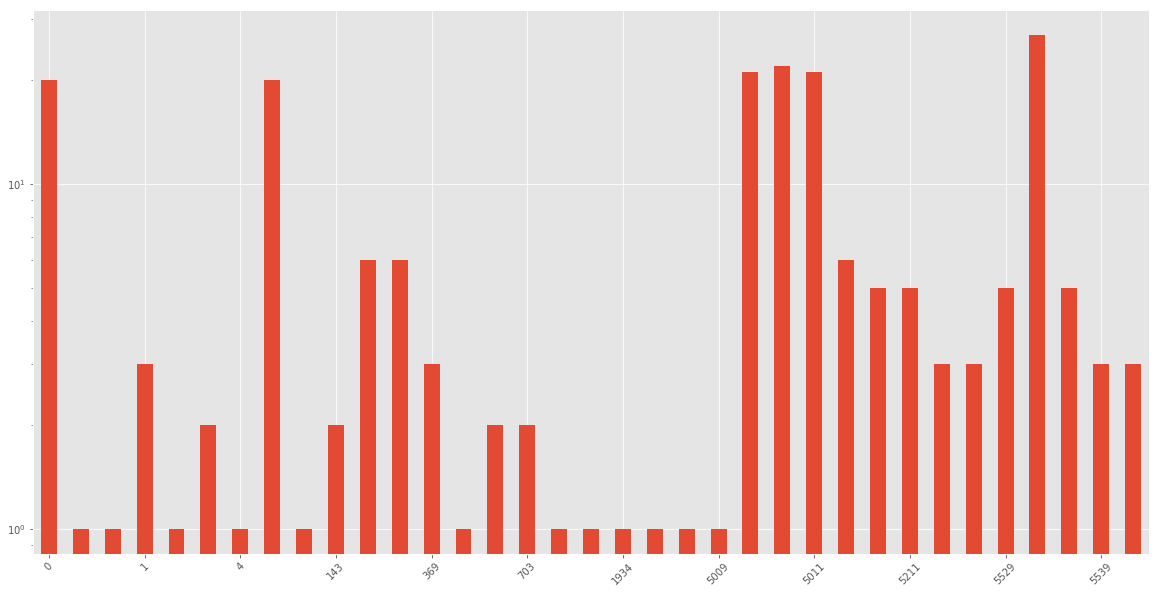

In [59]:
plot(nans.sort_values())

In [217]:
val_type.to_csv(r'C:\Users\Mateusz\Desktop\val_types.txt', header=None, index=None, sep=' ', mode='a')

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:

# print(unique.sort_values().values)
# print(nans.values)